<a href="https://colab.research.google.com/github/juliaj-fiesc/Projeto-Aplicado---Proje-o-de-Faturamento/blob/main/Projeto_Aplicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso:Pós-Graduação em Ciência de Dados e Inteligência Artificial
Turma:PG PGCD 2025/1 1

Unidade Curricular: Projeto Aplicado - 461344

Professor: Willian Daniel de Matos

Alunos: Adriano Maluf Teixeira, Cristina Aurich, Eliane Nunes da Silva, Julia de Souza Jorge

# Relatório Técnico: Projeto Aplicado
# Tema: Projeção de Faturamento
Este projeto foi desenvolvido no âmbito da Pós-Graduação em Ciência de Dados e Inteligência Artificial, com o propósito de aplicar técnicas de análise de dados e métodos estatísticos para apoiar a tomada de decisão dos gestores dos negócios. Foram analisados dados históricos de faturamento da instituição com o objetivo de avaliar o comportamento dos dados e, a partir disso:
construir um modelo de distribuição mensal de faturamento;
elaborar um modelo capaz de prever os valores de faturamento, tendo como base dados históricos.


# Entendimento dos Dados

In [ ]:
# Importando as bibliotecas para análise e geração de gráficos estatísticos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Criando um dataset a partir de uma planilha com os dados de faturamento dos negócios da FIESC.
df = pd.read_excel('/content/dados_faturamento.xlsx')

In [ ]:
# Visualização do dataset para verificar a correta importação dos dados
df.head()

,gr_regional,nm_regional,regional,valor,fl_regional,ds_tipo_pessoa,ds_cr_nivel_3,ds_grupo_negocio,ds_negocio,data
0,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,960.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-11-06
1,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,1260.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-10-10
2,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,905.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-10-09
3,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,1510.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-08-18
4,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,1688.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-11-09


Com a visualização do dataset, vimos que a importação foi realizada corretamente.

In [ ]:
# Consulta do tamanho do dataset em linhas e colunas, respectivamente.
df.shape

(143565, 10)

In [ ]:
# Consulta do formato dos dados e a quantidade de dados não nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143565 entries, 0 to 143564
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gr_regional       143565 non-null  object        
 1   nm_regional       143565 non-null  object        
 2   regional          143565 non-null  object        
 3   valor             143565 non-null  float64       
 4   fl_regional       143565 non-null  object        
 5   ds_tipo_pessoa    143565 non-null  object        
 6   ds_cr_nivel_3     143565 non-null  object        
 7   ds_grupo_negocio  143565 non-null  object        
 8   ds_negocio        143565 non-null  object        
 9   data              143565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 11.0+ MB


In [ ]:
# COnsulta da quantidade de dados nulos por variável.
df.isnull().sum()

,0
gr_regional,0
nm_regional,0
regional,0
valor,0
fl_regional,0
ds_tipo_pessoa,0
ds_cr_nivel_3,0
ds_grupo_negocio,0
ds_negocio,0
data,0


Por se tratar de uma base de dados tratada do Big Data da FIESC, não há dados nulos.

In [ ]:
# Consulta da quantidade de dados únicos por variável.
df.nunique()

,0
gr_regional,11
nm_regional,16
regional,20
valor,68591
fl_regional,2
ds_tipo_pessoa,5
ds_cr_nivel_3,7
ds_grupo_negocio,10
ds_negocio,40
data,1452


In [ ]:
# Consulta de linhas duplicadas
df[df.duplicated(keep=False)]

,gr_regional,nm_regional,regional,valor,fl_regional,ds_tipo_pessoa,ds_cr_nivel_3,ds_grupo_negocio,ds_negocio,data


Com a consulta acima foi possível verificar que não há linhas duplicadas no Dataset.

In [ ]:
# Soma do faturamento total. A operação foi feita a partir da soma dos valores da variável "valor", no período de 01/22 a 09/25.
valor_faturamento = df['valor'].sum()
print(valor_faturamento)

1338609377.91


In [ ]:
# Adequação do formato do valor total de faturamento calculado para monetário.
valor_faturamento_formatado = f'R$ {valor_faturamento:,.2f}'.replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.')
print(valor_faturamento_formatado)

R$ 1.338.609.377,91


In [ ]:
# Extração do ano e do mês da variável "data" do dataset, criando duas novas colunas: data e mes para contabilização do faturamento mensal.
ano = df['data'].dt.year
df['ano'] = ano

mes = df['data'].dt.month
df['mes'] = mes

In [ ]:
# Consulta dos dados do dataset com a adição das colunas: ano e mes.
df.head()

,gr_regional,nm_regional,regional,valor,fl_regional,ds_tipo_pessoa,ds_cr_nivel_3,ds_grupo_negocio,ds_negocio,data,ano,mes
0,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,960.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-11-06,2023,11
1,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,1260.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-10-10,2023,10
2,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,905.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-10-09,2023,10
3,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,1510.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-08-18,2023,8
4,Planalto Norte e Vale do Itapocu,Planalto Norte,Planalto Norte,1688.0,Executora,PF_Cartao,Saúde,SAÚDE,Promoção da Saúde,2023-11-09,2023,11


Com os dados mostrados acima é possível validar a inclusão das colunas: ano e mes e a conformidade dos valores em relação a coluna "data"

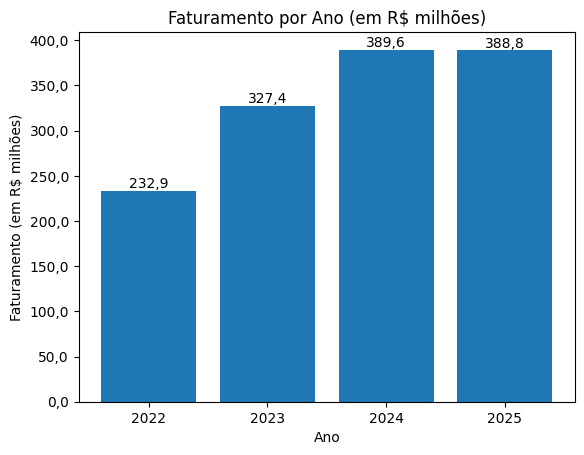

In [ ]:
# Uso da biblioteca Matplotlib para geração de um gráfico de barras que compara o faturamento total por ano, no período de 2022 até setembro de 2025.

from matplotlib.ticker import MaxNLocator, FuncFormatter

faturamento_por_ano = df.groupby('ano')['valor'].sum()

fig, ax = plt.subplots()
bars = ax.bar(faturamento_por_ano.index.astype(str), faturamento_por_ano.values)

ax.set_title('Faturamento por Ano (em R$ milhões)')
ax.set_xlabel('Ano')
ax.set_ylabel('Faturamento (em R$ milhões)')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Cria uma função de formatação customizada para os dados do eixo y
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.1f}'.replace('.', ',')

# Aplica a formatação customizada para o eixo y
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Adiciona rótulos abreviados para as barras em milhões
for bar in bars:
    yval = bar.get_height()
    # Abrevia em milhões e formata para uma casa decimal
    label = f'{yval/1_000_000:.1f}'.replace('.', ',') # Substitui o ponto por vírgula, de maneira a adotar o padrão brasileiro de moeda
    plt.text(bar.get_x() + bar.get_width()/2, yval, label, va='bottom', ha='center')

plt.show()

A partir do gráfico de colunas apresentado, observa-se uma tendência de crescimento anual no faturamento de serviços da FIESC entre os anos de 2022 e 2024, passando de 232,9 milhões em 2022 para R$ 389,6 milhões em 2024.

Embora o valor de 2025 (R$ 388,8 milhões) ainda não represente o exercício completo, uma vez que contempla dados apenas até o mês de setembro, verifica-se que o desempenho já se aproxima do total registrado em 2024. Tal comportamento indica uma tendência positiva, sugerindo que o faturamento de 2025 poderá superar o resultado do ano anterior ao final do período.

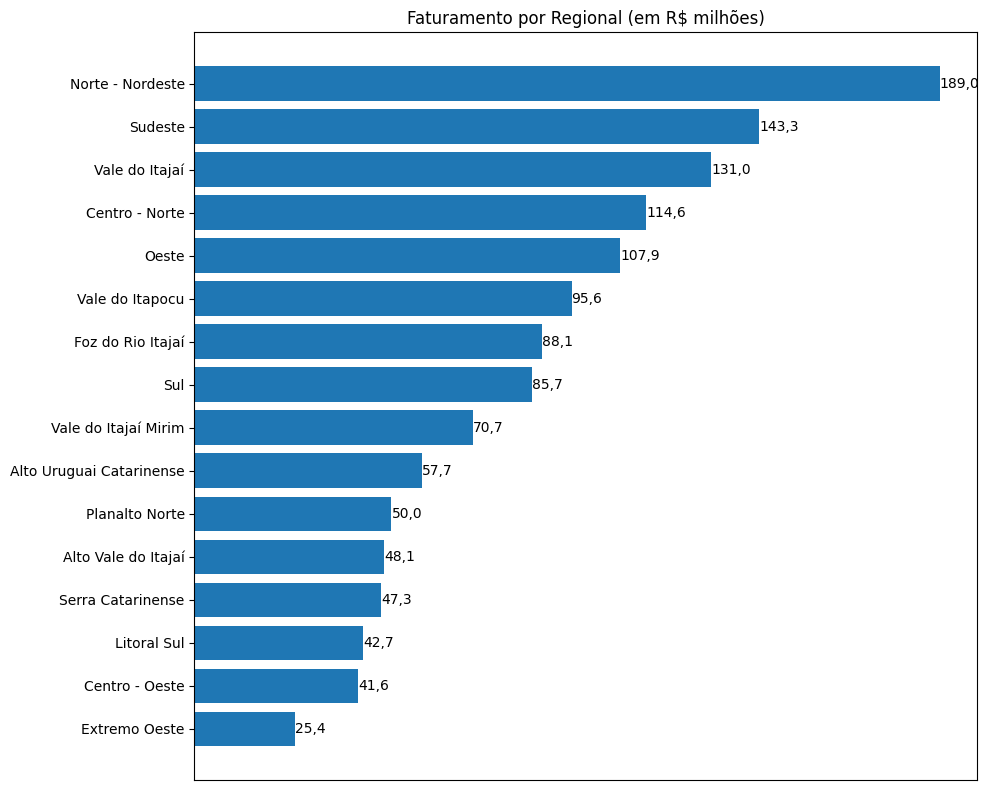

In [ ]:
# Após a análise do faturamento anual, procedeu-se à investigação da distribuição do faturamento por regional, a fim de identificar variações geográficas no desempenho financeiro.
# SPara tanto, foi gerado um gráfico de barras horizontais que representa o faturamento total de cada regional, expresso em milhões de reais.

faturamento_por_regional = df.groupby('nm_regional')['valor'].sum().sort_values(ascending=True) # Classifica dados por ordem ascendente

fig, ax = plt.subplots(figsize=(10, 8))  # Ajusta o tamando da figura

# Altera para gráfico de barra
bars = ax.barh(faturamento_por_regional.index.astype(str), faturamento_por_regional.values)

ax.set_title('Faturamento por Regional (em R$ milhões)') # Ajusta o título do gráfico
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Cria uma função de formatação customizada para os dados do eixo x
def millions_formatter(x, pos):
    return f'R$ {x / 1_000_000:.1f} mi'.replace('.', ',')

# Aplica a formatação customizada para o eixo x
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Oculta os rótulos do eixo x
ax.xaxis.set_visible(False)

# Adiciona rótulos abreviados para as barras em milhões
for bar in bars:
    xval = bar.get_width()
    # Abrevia em milhões e formata para uma casa decimal
    label = f'{xval/1_000_000:.1f}'.replace('.', ',') # Substitui o ponto por vírgula, de maneira a adotar o padrão brasileiro de moeda
    plt.text(xval, bar.get_y() + bar.get_height()/2, label, va='center', ha='left')
plt.tight_layout() # Ajusta o layout para prevenir sobreposição do valor dos rótulos
plt.show()

O gráfico de barras horizontais apresenta a distribuição do faturamento de serviços por regional da FIESC, expresso em milhões de reais. Observa-se uma considerável variação entre as regionais, evidenciando diferenças geográficas no desempenho financeiro.

A Regional Norte-Nordeste destaca-se como a de maior faturamento, totalizando aproximadamente 189 milhões, o que representa um desempenho significativamente superior em relação às demais. Na sequência, as regionais Sudeste (143,3 milhões) e Vale do Itajaí (131 milhões) ocupam posições de destaque, consolidando-se como importantes polos de geração de receita.

Por outro lado, as regionais Centro Oeste (41,6 milhões) e Extremo Oeste (25,4 milhões) apresentam os menores valores de faturamento, indicando menor participação relativa no total consolidado.

De modo geral, o gráfico revela uma concentração do faturamento nas regiões mais industrializadas e economicamente dinâmicas, o que pode estar associado a fatores como densidade empresarial, estrutura produtiva e presença de grandes indústrias. Essa heterogeneidade regional sugere a importância de estratégias diferenciadas de atuação e desenvolvimento, considerando as especificidades de cada território.

Outra forma de demonstrar os dados de faturamento por regional está representada no mapa abaixo.

In [ ]:
#mapa por regional - configuração dos arquivos - json
from google.colab import files
uploaded = files.upload()

Saving geojs-42-mun.json to geojs-42-mun.json


In [ ]:
#municipios por regional - VP

from google.colab import files
uploaded = files.upload()

Saving Municipios_por_regionalVP.xlsx to Municipios_por_regionalVP.xlsx


In [ ]:
#visualização dados

import os
os.listdir("/content")

['.config',
 'geojs-42-mun.json',
 'Municipios_por_regionalVP.xlsx',
 '.ipynb_checkpoints',
 'dados_faturamento.xlsx',
 'sample_data']

In [ ]:
#plotar mapa das regionais, com agrupamento dos municipios por regional

import pandas as pd
import json
import plotly.express as px
import shapely.geometry
import os

# ================================
# 1. Carregar GeoJSON e Extrair Coordenadas
# ================================
geojso_file_path = "/content/geojs-42-mun.json"

with open(geojso_file_path, "r", encoding="utf-8") as f:
    geojson_sc = json.load(f)

municipios_coords = []
for feature in geojson_sc["features"]:
    nome = feature["properties"]["name"]
    geom = shapely.geometry.shape(feature["geometry"])
    centroid = geom.centroid
    municipios_coords.append([nome, centroid.y, centroid.x])

coords_df = pd.DataFrame(municipios_coords, columns=["municipio", "lat", "lon"])

# ================================
# 2. Carregar o Mapeamento Real
# ================================

df_map = pd.read_excel('/content/Municipios_por_regionalVP.xlsx')

# Padronizar nomes das colunas para facilitar o merge

df_map = df_map.rename(columns={"Região VP": "nm_regional", "Município": "municipio"})

# ================================
# 3. Calcular o Centroide de Cada Regional
# ================================
# 1. Junta as coordenadas (lat/lon) no arquivo de mapeamento
regional_geo = df_map.merge(coords_df, on="municipio", how="inner")

# 2. Agrupa por Regional e calcula a MÉDIA da lat/lon

centros_regionais = regional_geo.groupby("nm_regional")[['lat', 'lon']].mean().reset_index()

# ================================
# 4. Preparar Dados de Faturamento
# ================================

# Recalculamos faturamento_por_regional para garantir que seja um DataFrame com a estrutura correta para o merge.
faturamento_por_regional = df.groupby('nm_regional')['valor'].sum().reset_index()

# ================================
# 5. Mesclagem Final
# ================================
# Junta o faturamento com as coordenadas centrais das regionais
df_final = faturamento_por_regional.merge(centros_regionais, on="nm_regional", how="left")

# Remove regionais que não tenham coordenadas (caso haja divergência de nomes)
df_final.dropna(subset=['lat', 'lon'], inplace=True)

# ================================
# 6. Plotar Mapa
# ================================
fig = px.scatter_mapbox(
    df_final,
    lat="lat",
    lon="lon",
    size="valor",
    size_max=50,  # Ajuste conforme necessário para o tamanho das bolhas
    hover_name="nm_regional",
    hover_data={'nm_regional': True, 'valor': True, 'lat': False, 'lon': False},
    color="valor",
    color_continuous_scale="Blues",
    zoom=6,
    center={"lat": -27.2423, "lon": -50.2189}, # Centraliza em SC
    mapbox_style="carto-positron",
    title="Faturamento por Regional (Centroide Calculado)"
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

O código a seguir cria uma visualização interativa de séries temporais, permitindo explorar e comparar o faturamento mensal por ano entre diferentes grupos de negócio de forma dinâmica.

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
from IPython.display import display
from matplotlib.ticker import FuncFormatter

# Criar lista de grupos de negócio
grupos_negocio = df['ds_grupo_negocio'].unique()

# Criar caixa seletora do grupo de negócios
grupo_negocio_dropdown = Dropdown(
    options=['Todos'] + list(grupos_negocio),
    description='Grupo de Negócio:',
    disabled=False,
)

# Cria uma função para formatar os valores do eixo y
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.1f}'.replace('.', ',')

# Criar uma função para atualizar o gráfico, com base no grupo de negócio selecionado na caixa de seleção
def update_plot(selected_grupo):
    if selected_grupo == 'Todos':
        df_plot = df
    else:
        df_plot = df[df['ds_grupo_negocio'] == selected_grupo]

    faturamento_por_mes_ano = df_plot.groupby(['ano', 'mes'])['valor'].sum().unstack(level=0)

    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    faturamento_por_mes_ano.plot(kind='line', title=f'Faturamento por mês e ano - {selected_grupo}', ax=ax)
    plt.xlabel('Mês')
    plt.ylabel('Faturamento (em R$ milhões)')
    plt.xticks(range(1, 13), ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter)) # Aplica a formatação customizada para o eixo y
    plt.grid(True)
    plt.show()

# Criar a interação da caixa de seleção com o gráfico
interact(update_plot, selected_grupo=grupo_negocio_dropdown);

interactive(children=(Dropdown(description='Grupo de Negócio:', options=('Todos', 'SAÚDE', 'PROFISSIONAL', 'BÁ…

O próximo gráfico apresenta a mesma informação, porém detalhada no nível mais analítico de negócio.

In [ ]:
# Criar lista de grupos de negócio
negocio = df['ds_negocio'].unique()

# Criar caixa seletora do grupo de negócios
grupo_negocio_dropdown = Dropdown(
    options=['Todos'] + list(negocio),
    description='Grupo de Negócio:',
    disabled=False,
)

# Cria uma função para formatar os valores do eixo y
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.1f}'.replace('.', ',')

# Criar uma função para atualizar o gráfico, com base no grupo de negócio selecionado na caixa de seleção
def update_plot(selected_grupo):
    if selected_grupo == 'Todos':
        df_plot = df
    else:
        df_plot = df[df['ds_negocio'] == selected_grupo]

    faturamento_por_mes_ano = df_plot.groupby(['ano', 'mes'])['valor'].sum().unstack(level=0)

    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    faturamento_por_mes_ano.plot(kind='line', title=f'Faturamento por mês e ano - {selected_grupo}', ax=ax)
    plt.xlabel('Mês')
    plt.ylabel('Faturamento (em R$ milhões)')
    plt.xticks(range(1, 13), ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter)) # Aplica a formatação customizada para o eixo y
    plt.grid(True)
    plt.show()

# Criar a interação da caixa de seleção com o gráfico
interact(update_plot, selected_grupo=grupo_negocio_dropdown);

interactive(children=(Dropdown(description='Grupo de Negócio:', options=('Todos', 'Promoção da Saúde', 'Saúde …

O próximo código agrupa os dados por regional (gr_regional) e categoria de negócio (ds_cr_nivel_3), somando os valores de faturamento.

Em seguida, gera um mapa de calor que permite identificar, de maneira intuitiva, as regiões e negócios com maior ou menor participação no faturamento total.

Os valores são exibidos formatados em milhares de reais, com duas casas decimais, facilitando a interpretação visual e comparativa dos resultados.

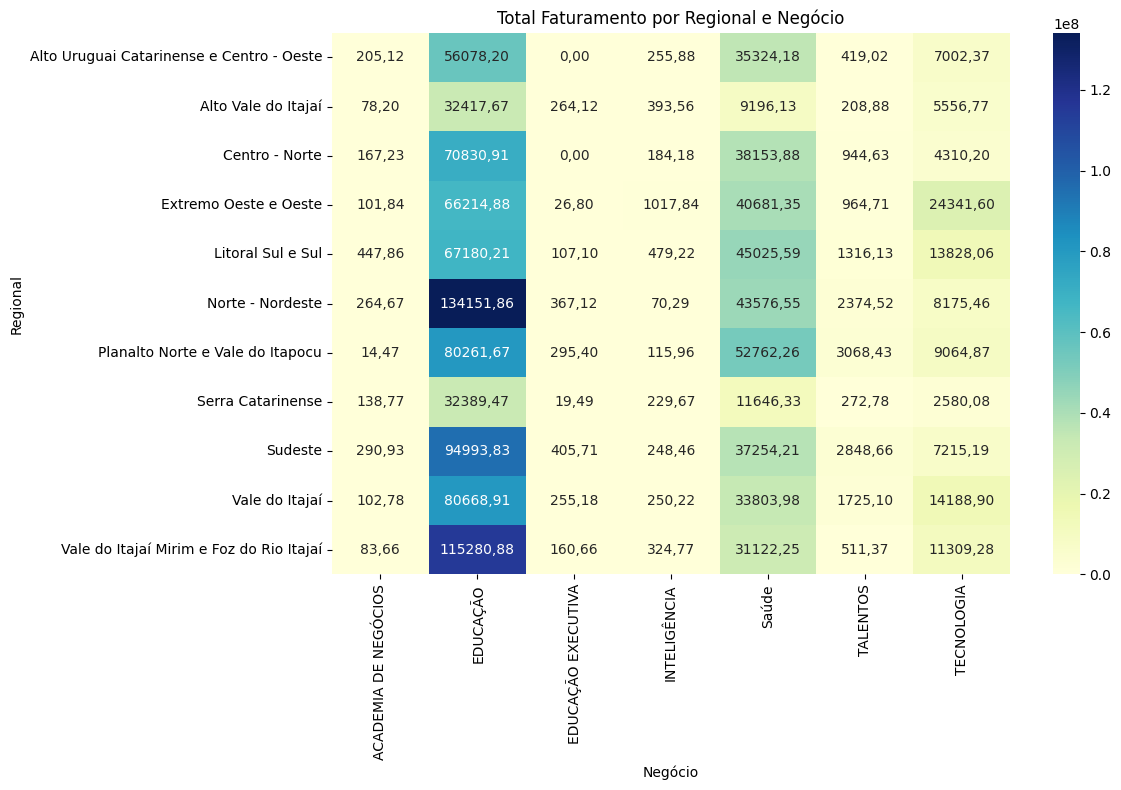

In [ ]:
# Agrupo por Regional (gr_regional) e Negócio (ds_cr_nivel_3) e somar o valor.
matrix_data = df.groupby(['gr_regional', 'ds_cr_nivel_3'])['valor'].sum().unstack(fill_value=0)

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_data, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Total Faturamento por Regional e Negócio')
plt.xlabel('Negócio')
plt.ylabel('Regional')

# Cria uma função para formatar os valores do gráfico
def thousands_formatter(x):
    return f'{x/1000:.2f}'.replace('.', ',')

# Aplica a função de formatação
for text in plt.gca().texts:
    text.set_text(thousands_formatter(float(text.get_text())))

plt.tight_layout()
plt.show()

O mapa de calor apresentado demonstra o faturamento total (em milhares de reais) distribuído entre as regionais e os segmentos de negócio. As tonalidades variam do amarelo claro ao azul escuro, indicando menores e maiores volumes de faturamento, respectivamente.

De modo geral, é possível observar uma concentração expressiva de faturamento no segmento de Educação, especialmente nas regionais Norte-Nordeste, Vale do Itajaí Mirim e Foz do Rio Itajaí, e Sudeste, que apresentam os valores mais elevados nesse eixo. Essa concentração sugere que as atividades educacionais constituem um importante vetor de receita para essas unidades.

Em contrapartida, alguns segmentos como “Formação Executiva” e “Tecnologia” apresentam valores mais baixos de faturamento na maioria das regionais, indicando menor representatividade ou menor amplitude de atuação nessas áreas.

Outro ponto relevante é a heterogeneidade regional: enquanto certas regionais, como Norte-Nordeste e Vale do Itajaí Mirim e Foz do Rio Itajaí, exibem destaque em múltiplos segmentos, outras — como Serra Catarinense e Alto Vale do Itajaí — apresentam faturamento mais modesto e concentrado em poucos negócios.

Assim, o gráfico evidencia tanto a predominância de determinados segmentos (principalmente Educação e Saúde) quanto as diferenças de desempenho entre as regionais, oferecendo subsídios importantes para análises estratégicas sobre distribuição territorial de receitas, especialização regional e oportunidades de expansão.

# Criação de função para distribuição mensal do faturamento

Foi desenvolvida uma função em python com o objetivo de projetar o faturamento mensal, com base na distribuição real de faturamento dos anos de 2023 e 2024. Para isso, ele aplica uma lógica de ponderação que calcula o peso percentual de cada mês dentro do total faturado no período selecionado, distribuindo a meta anual informada proporcionalmente entre os meses. A aplicação permite filtrar os dados por regional, grupo de negócio e negócio, ajustando automaticamente os resultados conforme os recortes escolhidos. Além disso, o código gera uma tabela detalhada com os valores históricos consolidados, seus respectivos pesos e a meta mensal projetada.

A interface possibilita que o usuário selecione filtros e visualize os resultados de forma dinâmica. O gráfico é gerado a partir da soma consolidada das metas mensais respeitando os filtros selecionados e apresenta uma barra única para cada mês, facilitando a compreensão da projeção ao longo do ano. Com essa combinação de filtros, cálculos automáticos, exibição tabular e visualização gráfica, o código funciona como uma ferramenta analítica que apoia o planejamento financeiro e o acompanhamento de metas, permitindo análises rápidas, intuitivas e comparáveis entre diferentes unidades e segmentos da organização. Foram criados filtros interativos e tabela de faturamento mensal projetada:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# -------------------------------------------------------
# Função para formatar valores em R$
# -------------------------------------------------------
def format_real(valor):
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# -------------------------------------------------------
# Função principal de projeção
# -------------------------------------------------------
def projetar_faturamento(df, meta_anual):
    df2 = df[df["ano"].isin([2023, 2024])].copy()

    agrupado = (
        df2.groupby(["ds_grupo_negocio", "ds_negocio", "gr_regional", "mes"])["valor"]
        .sum()
        .reset_index(name="soma_2_anos")
    )

    total_grupo = (
        agrupado.groupby(["ds_grupo_negocio", "ds_negocio", "gr_regional"])["soma_2_anos"]
        .transform("sum")
    )

    agrupado["peso_%"] = (agrupado["soma_2_anos"] / total_grupo) * 100
    agrupado["meta_mensal"] = (agrupado["peso_%"] / 100) * meta_anual

    return agrupado.sort_values(["ds_grupo_negocio", "ds_negocio", "gr_regional","mes"])


# -------------------------------------------------------
# Widgets (filtros)
# -------------------------------------------------------
dropdown_regional = widgets.Dropdown(
    options=["Todos"] + sorted(df["gr_regional"].unique()),
    description="Regional:",
    layout={"width": "300px"}
)
dropdown_grupo = widgets.Dropdown(
    options=["Todos"] + sorted(df["ds_grupo_negocio"].unique()),
    description="Grupo:",
    layout={"width": "300px"}
)

dropdown_negocio = widgets.Dropdown(
    options=["Todos"],
    description="Negócio:",
    layout={"width": "300px"}
)

input_meta = widgets.FloatText(
    description="Meta anual:",
    value=1000000,
    layout={"width": "200px"}
)

btn = widgets.Button(description="Atualizar", button_style="primary")
out = widgets.Output()


# -------------------------------------------------------
# Atualiza lista de negócios conforme o grupo
# -------------------------------------------------------
def atualizar_negocios(*args):
    grupo = dropdown_grupo.value
    if grupo == "Todos":
        negocios = sorted(df["ds_negocio"].unique())
    else:
        negocios = sorted(df[df["ds_grupo_negocio"] == grupo]["ds_negocio"].unique())
    dropdown_negocio.options = ["Todos"] + negocios

dropdown_grupo.observe(atualizar_negocios, "value")


# -------------------------------------------------------
# Função que gera a tabela + gráfico
# -------------------------------------------------------
def gerar_e_mostrar(_):
    regional = dropdown_regional.value # Fixed: Assign regional value from dropdown
    grupo = dropdown_grupo.value
    negocio = dropdown_negocio.value
    meta = input_meta.value

    df_filtro = df.copy()

    if regional != "Todos":
        df_filtro = df_filtro[df_filtro["gr_regional"] == regional]

    if grupo != "Todos":
        df_filtro = df_filtro[df_filtro["ds_grupo_negocio"] == grupo]

    if negocio != "Todos":
        df_filtro = df_filtro[df_filtro["ds_negocio"] == negocio]

    resultado = projetar_faturamento(df_filtro, meta)

    # ----- Tabela -----
    tabela_display = resultado.copy()
    tabela_display["soma_2_anos"] = tabela_display["soma_2_anos"].apply(format_real)
    tabela_display["meta_mensal"] = tabela_display["meta_mensal"].apply(format_real)

    with out:
        clear_output(wait=True)

        print(f"Filtro – Regional: {regional} | Grupo: {grupo} | Negócio: {negocio} | Meta anual: {format_real(meta)}")
        print("-" * 70)

        # remover índice antes de exibir
        tabela_sem_indice = tabela_display.reset_index(drop=True)
        display(tabela_sem_indice.style)

        # ----- GRÁFICO -----
        plt.figure(figsize=(12, 5))

        # Nomes dos meses
        meses_pt = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun',
                    'jul', 'ago', 'set', 'out', 'nov', 'dez']

        resultado_plot = (
    resultado.groupby("mes")["meta_mensal"]
    .sum()
    .reset_index()
    .sort_values("mes")
)

        barras = plt.bar(
            resultado_plot["mes"],
            resultado_plot["meta_mensal"]
        )

        plt.title("Projeção de Faturamento Mensal")
        plt.xlabel("Mês")
        plt.ylabel("Faturamento Projetado (R$)")

        # Substitui números pelos nomes dos meses
        plt.xticks(resultado_plot["mes"], [meses_pt[m-1] for m in resultado_plot["mes"]])

        plt.grid(axis="y", linestyle="--", alpha=0.4)

        # ---- Valores acima das barras ----
        for barra, valor in zip(barras, resultado_plot["meta_mensal"]):
            plt.text(
                barra.get_x() + barra.get_width() / 2,
                barra.get_height(),
                format_real(valor),
                ha="center",
                va="bottom",
                fontsize=9
            )

        plt.tight_layout()
        plt.show()


btn.on_click(gerar_e_mostrar)

# Exibir interface
display(dropdown_regional, dropdown_grupo, dropdown_negocio, input_meta, btn, out)


Dropdown(description='Regional:', layout=Layout(width='300px'), options=('Todos', 'Alto Uruguai Catarinense e …

Dropdown(description='Grupo:', layout=Layout(width='300px'), options=('Todos', 'ACADEMIA', 'APOIO AO NEGÓCIO E…

Dropdown(description='Negócio:', layout=Layout(width='300px'), options=('Todos',), value='Todos')

FloatText(value=1000000.0, description='Meta anual:', layout=Layout(width='200px'))

Button(button_style='primary', description='Atualizar', style=ButtonStyle())

Output()

Observa-se que o gráfico acima condiz com o comportamento de faturamento no negócio “Graduação” evidenciando os picos de faturamento concentrados no período de matrículas, fevereiro e julho.

# Considerações da Função para distribuição mensal do faturamento

Com a função criada, a operação que hoje é realizada manualmente para distribuição da meta ao longo do ano, através de planilhas eletrônicas, poderá ser feita de maneira mais ágil e confiável. Além disso, exige baixo esforço comparado ao modelo tradicional, pois para gerar uma nova distribuição é necessário somente a atualização do dataset com os dados dos dois últimos anos e a substituição do período desejado no código da função.


# Modelo Preditivo com Deep Learning
Considerando os dados históricos de faturamento das entidades do Sistema FIESC apresentados neste material, a proposta a seguir visa elaborar um modelo de máquina que seja capaz de prever os valores de faturamento, tendo como base para o aprendizado esses dados históricos. Por conta da complexidade dos dados, optou-se por desenvolver um modelo focado na predição de valores de um único negócio, no caso a **Graduação**, também levando-se em conta os constantes desafios e a forte concorrência que a entidade SENAI enfrenta nesta modalidade. Além disso, como já visto na etapa de entendimento dos dados, esse negócio possui uma característica forte de sazonalidade, que pode permitir um processamento com menos ruídos. Também optou-se, considerando a complexidade da projeção, em não especificar os valores preditos por regional.

O algoritmo escolhido para o desenvolvimento desse modelo foi o **Long Short-Term Memory (LSTM)**. A escolha dessa técnica se fundamenta na natureza sequencial e temporal das informações financeiras. O faturamento de uma empresa é fortemente influenciado por padrões históricos, sazonalidades e tendências que se desenvolvem ao longo do tempo. Modelos tradicionais de regressão não seriam tão eficazes para capturar essas dependências temporais, pois tratam os dados como independentes entre si.

O LSTM, por outro lado, é uma arquitetura avançada de Redes Neurais Recorrentes (RNN) projetada para lidar com séries temporais e dependências de longo prazo. Ele utiliza mecanismos internos chamados células de memória, que permitem armazenar informações relevantes por períodos prolongados e descartar dados irrelevantes. Essa característica é essencial para prever faturamento, pois possibilita que o modelo reconheça padrões como:

*   Sazonalidade (variações mensais, trimestrais ou anuais);
*   Tendências de crescimento ou queda ao longo dos anos;
*   Impactos de eventos passados que influenciam períodos futuros.

# Preparação dos Dados
A primeira etapa do processo foi criar um novo dataframe (df_filtrado), a partir do dataframe principal (df), contendo a seleção do negócio "Graduação".

In [ ]:
# Criando um novo dataframe que contém dados apenas do negócio 'Graduação'.
df_filtrado = df[df['ds_negocio'] == 'Graduação']
df_filtrado.head()

,gr_regional,nm_regional,regional,valor,fl_regional,ds_tipo_pessoa,ds_cr_nivel_3,ds_grupo_negocio,ds_negocio,data,ano,mes
124855,Planalto Norte e Vale do Itapocu,Vale do Itapocu,Vale do Itapocu,25959.47,Executora,Fisica,EDUCAÇÃO,SUPERIOR,Graduação,2023-08-20,2023,8
124856,Planalto Norte e Vale do Itapocu,Vale do Itapocu,Vale do Itapocu,2965.29,Executora,Fisica,EDUCAÇÃO,SUPERIOR,Graduação,2022-04-16,2022,4
124857,Planalto Norte e Vale do Itapocu,Vale do Itapocu,Vale do Itapocu,765.55,Executora,Fisica,EDUCAÇÃO,SUPERIOR,Graduação,2024-10-17,2024,10
124858,Planalto Norte e Vale do Itapocu,Vale do Itapocu,Vale do Itapocu,79065.89,Executora,Fisica,EDUCAÇÃO,SUPERIOR,Graduação,2023-02-20,2023,2
124859,Planalto Norte e Vale do Itapocu,Vale do Itapocu,Vale do Itapocu,9726.78,Executora,Fisica,EDUCAÇÃO,SUPERIOR,Graduação,2023-01-30,2023,1


Considerando a proposta apresentada, foram mantidas apenas as colunas de "data" e "valor", que consistem nas features essenciais para a predição do modelo. Ficou definido, desta forma, o "X" ("data") e o "y" ("valor") do novo dataframe.

In [ ]:
# Manter apenas as colunas de 'data' e 'valor'.
df_filtrado = df_filtrado[['data', 'valor']]
df_filtrado.head(100)

,data,valor
124855,2023-08-20,25959.47
124856,2022-04-16,2965.29
124857,2024-10-17,765.55
124858,2023-02-20,79065.89
124859,2023-01-30,9726.78
...,...,...
124950,2022-08-31,17828.40
124951,2025-07-29,2333.64
124952,2022-08-05,554.50
124953,2022-04-29,1828.64


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3053 entries, 124855 to 130666
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    3053 non-null   datetime64[ns]
 1   valor   3053 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 71.6 KB


Como já observado anteriormente, não há valores nulos no dataframe. No entanto, existem datas repetidas e valores faltantes (não há valores de faturamento em todos os dias do ano), o que pode ocasionar ruído e afetar a capacidade do modelo de aprender corretamente as relações entre períodos.

Para garantir a qualidade e consistência das informações, foi necessário aplicar dois procedimentos principais: agrupamento por data e valor e interpolação para valores faltantes.

O agrupamento visa eliminar duplicidades que poderiam distorcer os padrões temporais e comprometer a integridade da série histórica. Já a interpolação para valores faltantes foi aplicada para lidar com lacunas na sequência temporal. A ausência de dados pode prejudicar algoritmos como o LSTM, que dependem da continuidade da série para capturar dependências de longo prazo.

In [ ]:
# Truncar as datas em uma única data para cada mês, agregando por soma.
df_filtrado['data'] = pd.to_datetime(df_filtrado['data']).dt.to_period('M').dt.to_timestamp()

# Agrupa por data e valor para tratar datas duplicadas
df_filtrado = df_filtrado.groupby('data')['valor'].sum().reset_index()

# Define a coluna 'data' como o índice e aplica interpolação para valores faltantes
df_filtrado = df_filtrado.set_index('data').resample('D').interpolate()

df_filtrado.head()


,valor
data,
2022-01-01,47847.600000
2022-01-02,146127.780645
2022-01-03,244407.961290
2022-01-04,342688.141935
2022-01-05,440968.322581


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1370 entries, 2022-01-01 to 2025-10-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   1370 non-null   float64
dtypes: float64(1)
memory usage: 21.4 KB


Na sequência, aplicou-se o método **seasonal_decompose**, que tem como objetivo analisar a estrutura da série temporal do faturamento, separando seus componentes fundamentais: tendência (trend), sazonalidade (seasonal) e resíduos (resid).

O destaque pode ser observado no componente sazonal (seasonal), que demonstra um padrão repetitivo anual bem definido, com picos e quedas regulares. Os picos anuais, nos meses de fevereiro e julho, é justificado pelo período de apropriação dos contratos de cursos de Graduação, que ocorrem no início de cada semestre, coincidindo com o início do período de aulas.

[]

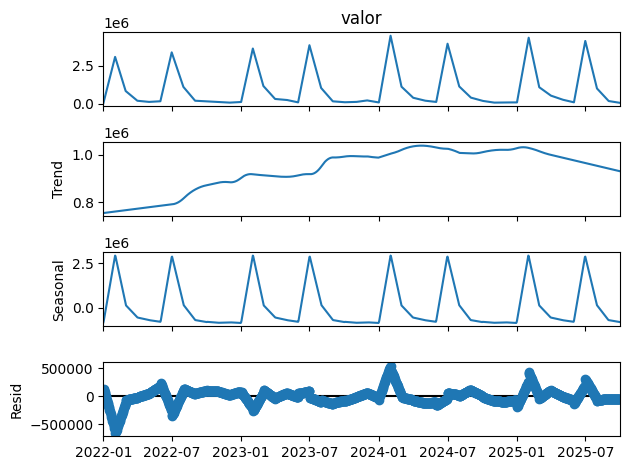

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(
    df_filtrado["valor"],
    model="additive",
    period=365,
    extrapolate_trend=True,
)

# plotar grafico
decomposed.plot()
plt.plot()

A partir deste ponto, foi realizada separação do conjunto de dados em treino (80%), validação (10%) e teste (10%).

Conjunto de treino (80%): Utilizado para ajustar os parâmetros do modelo. A maior parte dos dados é destinada ao treino para que o algoritmo aprenda os padrões históricos de faturamento, incluindo tendências e sazonalidades.

Conjunto de validação (10%): Serve para ajustar hiperparâmetros e avaliar o comportamento do modelo durante o processo de treinamento. Essa etapa é fundamental para evitar que o modelo se ajuste excessivamente aos dados de treino, comprometendo sua capacidade de generalização.

Conjunto de teste (10%): Utilizado para medir a performance final do modelo em dados nunca vistos. Essa avaliação fornece uma estimativa realista da capacidade do modelo de prever valores futuros, garantindo que ele não dependa exclusivamente dos padrões aprendidos no treino.

In [ ]:
# Definir os percentuais para dividir o conjunto em treino, validação e teste.
pct_train = 0.8
pct_valid = 0.1
pct_test = 0.1

# Aplicar os percentuais e definir o tamanho em valores absolutos do conjunto de treino, validação e teste.
train_size = int(round(pct_train * len(df_filtrado)))
valid_size = int(round(pct_valid * len(df_filtrado)))
test_size = int(round(pct_test * len(df_filtrado)))

# Separar o dataframe, definindo o intervalo de cada conjunto em dados de treino, validação e teste.
data_train = df_filtrado[0:train_size]
data_valid = df_filtrado[train_size: train_size+valid_size]
data_test = df_filtrado[train_size+valid_size:]

A próxima etapa consistiu na aplicação do método **RobustScaler** para normalização dos dados. Essa é uma etapa essencial para o treinamento de modelos baseados em redes neurais, como o LSTM, pois esses algoritmos são sensíveis à escala das variáveis.

O método RobustScaler foi escolhido por sua capacidade de reduzir o impacto de outliers na normalização. Diferentemente de técnicas como MinMaxScaler, que podem ser fortemente influenciadas por valores extremos, o RobustScaler utiliza medidas estatísticas robustas — mediana e intervalo interquartílico (IQR) — para ajustar a escala dos dados. Isso garante que a distribuição seja centralizada e redimensionada de forma mais estável, mesmo em séries temporais com picos sazonais ou variações abruptas, como é o caso do dataframe atual.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(data_train)

data_train_scaled = scaler.transform(data_train)
data_valid_scaled = scaler.transform(data_valid)
data_test_scaled = scaler.transform(data_test)

Após a normalização dos dados, foi necessário preparar a série temporal para o treinamento do modelo LSTM. Para isso, utilizou-se o método TimeSplitter, que é uma ferramenta voltada para a criação de janelas temporais (windows size) a partir de séries históricas.

Modelos como LSTM não trabalham diretamente com dados em formato de série contínua; eles precisam de sequências de observações para aprender padrões temporais. O TimeSplitter automatiza esse processo, dividindo os dados em blocos (janelas) que representam períodos consecutivos, permitindo que o modelo capture dependências de curto e longo prazo.

In [ ]:
# Instalar e importar a lib de forecast splitter
!pip install timesplitter
from timesplitter import TimeSplitter

# Escolher o tamanho da janela
WINDOW_SIZE = 20

# Utilizar o TimeSplitter para criar janelas deslizantes (sliding windows) sobre os dados normalizados.
splitter = TimeSplitter(train_size=WINDOW_SIZE, test_size=1, gap=0)

# Dividir os dados em X e y para treino, validação e teste
X_train_scaled, y_train_scaled = splitter.split(data_train_scaled)
X_valid_scaled, y_valid_scaled = splitter.split(data_valid_scaled)
X_test_scaled, y_test_scaled = splitter.split(data_test_scaled)

# Formatar o target
y_train_scaled = y_train_scaled.flatten().reshape(-1, 1)
y_valid_scaled = y_valid_scaled.flatten().reshape(-1, 1)
y_test_scaled = y_test_scaled.flatten().reshape(-1, 1)

In [ ]:
X_test_scaled.shape

(117, 20, 1)

In [ ]:
X_train_scaled[0].shape

(20, 1)

# Elaboração do Modelo de Rede Neural

O modelo de rede neural proposto foi desenvolvido com as seguintes sequências de camadas:


1) Camadas LSTM: Três camadas recorrentes com diferentes números de unidades (10, 20, 10) e ativação ReLU. As duas primeiras usam return_sequences=True para manter a saída sequencial, permitindo que camadas posteriores capturem dependências temporais mais complexas. A última camada LSTM resume a sequência para uma única saída.

2) Camadas densas: Duas camadas totalmente conectadas (50 e 10 neurônios) com ativação ReLU, responsáveis por aprender relações não lineares após a extração de padrões temporais.

3) Camada de saída: Uma única unidade com ativação linear, adequada para problemas de regressão, como previsão de faturamento.


Essa arquitetura foi escolhida para equilibrar capacidade de aprendizado temporal (via LSTM) e flexibilidade para ajustes não lineares (via camadas densas), garantindo previsões mais precisas.

In [ ]:
from keras import Sequential, layers

model = Sequential(
    [
        layers.Input(shape=(None,1)),

        # Camadas recorrente (units, activation, return_sequences)
        layers.LSTM(10, activation="relu", return_sequences=True),
        layers.LSTM(20, activation="relu", return_sequences=True),
        layers.LSTM(10, activation="relu", return_sequences=False),

        # Camadas densas
        layers.Dense(50, activation="relu"),
        layers.Dense(10, activation="relu"),

        # Camada de saída
        layers.Dense(1, activation="linear"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 10)       │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 20)       │         2,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,271 (20.59 KB)

 Trainable params: 5,271 (20.59 KB)

 Non-trainable params: 0 (0.00 B)

Uma etapa fundamental para o processo de otimização e aprendizado da máquina é definir a forma e as métricas que o modelo deve considerar no treinamento. Essa definição é executada pelo método **compile** e foi composta pelas seguintes métricas:

*  loss="mse" orienta o treinamento para minimizar erros quadráticos, adequado para regressão.

*  optimizer=Adadelta garante ajustes adaptativos dos pesos, melhorando estabilidade.

*  metrics=["mape"] fornece uma métrica percentual intuitiva para avaliar previsões de faturamento.







In [ ]:
from keras.optimizers import Adadelta

model.compile(
    loss="mse",
    optimizer=Adadelta(learning_rate=0.01),
    metrics=["mape"],
)

# Treinamento do Modelo

O treinamento do modelo foi ajustado com os seguintes hiperparâmetros:

1) epochs=900

Define o número de vezes que todo o conjunto de treino será processado pelo modelo. Um valor alto (900) é adequado para redes LSTM, pois elas precisam de várias iterações para aprender padrões temporais complexos como sazonalidade e tendência. Esse número foi escolhido para garantir convergência sem interromper o aprendizado prematuramente.


2) batch_size=128

Indica quantas amostras serão processadas antes da atualização dos pesos. Um batch maior (128) melhora a eficiência computacional e a estabilidade do gradiente, reduzindo oscilações durante o treinamento. Em séries temporais, isso ajuda a manter consistência no aprendizado.


3) validation_data=(X_valid_scaled, y_valid_scaled)

Permite avaliar o desempenho do modelo em dados não vistos durante o treino, monitorando métricas como MSE e MAPE a cada época. Essa validação é essencial para detectar overfitting e ajustar hiperparâmetros se necessário.

In [ ]:
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=900,
    batch_size=128,
    validation_data=(X_valid_scaled, y_valid_scaled)
)

Epoch 1/900
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.9867 - mape: 100.2305 - val_loss: 1.7927 - val_mape: 99.5465
Epoch 2/900
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.9497 - mape: 100.4224 - val_loss: 1.7897 - val_mape: 99.1109
Epoch 3/900
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 1.0690 - mape: 101.1444 - val_loss: 1.7853 - val_mape: 99.6430
Epoch 4/900
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.9632 - mape: 102.1982 - val_loss: 1.7807 - val_mape: 100.0416
Epoch 5/900
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.0240 - mape: 105.9696 - val_loss: 1.7761 - val_mape: 100.4382
Epoch 6/900
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.9816 - mape: 107.0573 - val_loss: 1.7717 - val_mape: 100.8461
Epoch 7/900
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 1.0176 - mape: 108.4457 - val_loss: 1.7670 - val_mape: 101.5534
Epoch 8/900
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.9597 - mape: 108.6162 - val_loss: 1.7623 - val_mape: 102.3455
Epoch 9/900
9/9 ━━━━━━━━━

Após o treinamento, foi analisado o histórico das métricas para avaliar se o modelo aprendeu de forma adequada e se não houve problemas como overfitting ou underfitting. O gráfico da curva de aprendizado mostra a evolução da loss (erro) para treino e validação ao longo das épocas.

Em linhas gerais, tanto a perda de treino quanto a de validação diminuem consistentemente, indicando aprendizado efetivo. Há uma convergência por volta da época 70, com uma queda acentuada na perda de validação, seguida por estabilização próxima à perda de treino. As curvas permanecem próximas até o final, sugerindo que o modelo generaliza bem para dados não vistos e minimiza os riscos de overfitting. Após cerca de 200 épocas, ambas as curvas praticamente atingem zero e permanecem estáveis até o final, indicando que o prolongamento para 900 épocas não trouxe ganhos significativos e que esse número poderia ser reduzido consideravelmente, poupando tempo sem perda de qualidade.

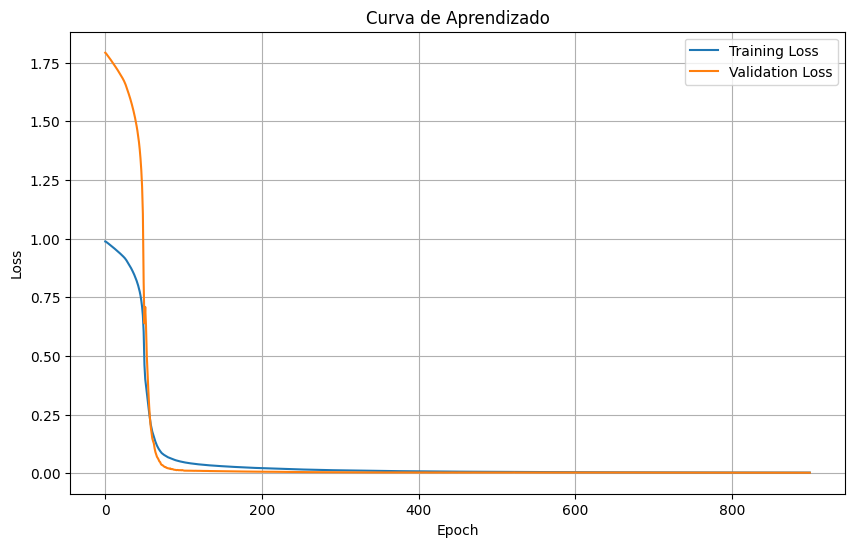

In [ ]:
# Levantar o histórico do treinamento.
history = model.history.history

# Plotar a curva de aprendizado.
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Curva de Aprendizado')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Avaliação do Modelo
Para avaliar o desempenho do modelo de previsão, foram utilizadas as seguintes métricas:

MAE (Mean Absolute Error - Erro Médio Absoluto): Representa a média das diferenças absolutas entre os valores previstos e os valores reais. Uma MAE menor indica um modelo mais preciso.

MAPE (Mean Absolute Percentage Error - Erro Percentual Médio Absoluto): Expressa a precisão como uma porcentagem do erro em relação ao valor real. Uma MAPE menor indica que as previsões estão mais próximas dos valores reais em termos percentuais.

R² (R-squared - Coeficiente de Determinação): Mede a proporção da variância na variável dependente que é previsível a partir da(s) variável(is) independente(s). Quanto mais próximo de 1, melhor o ajuste do modelo aos dados.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# As predições e os valores reais são obtidos das células anteriores
# A predição e na variável escalonada
y_test_scaled_predicted = model.predict(X_test_scaled)

y_test_predicted = scaler.inverse_transform(y_test_scaled_predicted).flatten()
y_test = scaler.inverse_transform(y_test_scaled).flatten()

print(f"MAE = {mean_absolute_error(y_test, y_test_predicted):,.2f}".replace(',', 'TEMP').replace('.', ',').replace('TEMP', '.'))
print(f"MAPE = {mean_absolute_percentage_error(y_test, y_test_predicted):.2%}".replace('.', ','))
print(f"R2 = {r2_score(y_test, y_test_predicted):.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
MAE = 39.473,69
MAPE = 9,25%
R2 = 0.9979


Resultados Obtidos


MAE: 39.473,69

Indica que, em média, as previsões diferem cerca de R$ 39,5 mil do valor real. Considerando os dados de faturamento da Graduação, esse valor é relativamente baixo, tendo em mente a escala dos dados.


MAPE: 9,25%

Um erro percentual inferior a 10% é considerado muito bom para previsões financeiras, mostrando alta precisão e boa capacidade de generalização.


R²: 0,9979

O modelo explica 99,79% da variabilidade da série, o que indica excelente ajuste e forte correlação entre valores previstos e reais.

O gráfico a seguir compara os dados de treino, validação e teste.

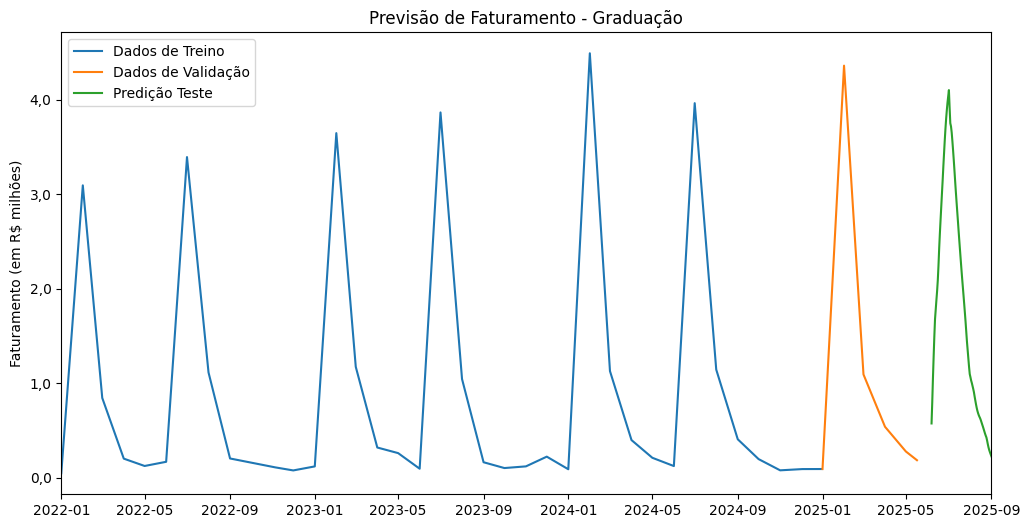

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Ajustar o tamanho do gráfico
plt.figure(figsize=(12, 6))

plt.plot(data_train.index, data_train["valor"], label='Dados de Treino')
plt.plot(data_valid.index, data_valid["valor"], label='Dados de Validação')
# plt.plot(df_filtrado.index, df_filtrado["valor"], label='Dados Originais')
plt.plot(data_test[WINDOW_SIZE:].index, y_test_predicted, label='Predição Teste')

plt.xlim([pd.to_datetime("2022-01"), pd.to_datetime("2025-09")])
plt.legend()

# Aplica a função de formatação
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.ylabel('Faturamento (em R$ milhões)')
plt.title('Previsão de Faturamento - Graduação')

plt.show()

Esse gráfico mostra que o modelo LSTM reproduziu corretamente a sazonalidade e tendência do faturamento, com previsões coerentes para o período de teste.

Um novo gráfico foi plotado, focando nos dados preditos e comparando com os dados reais do dataframe.

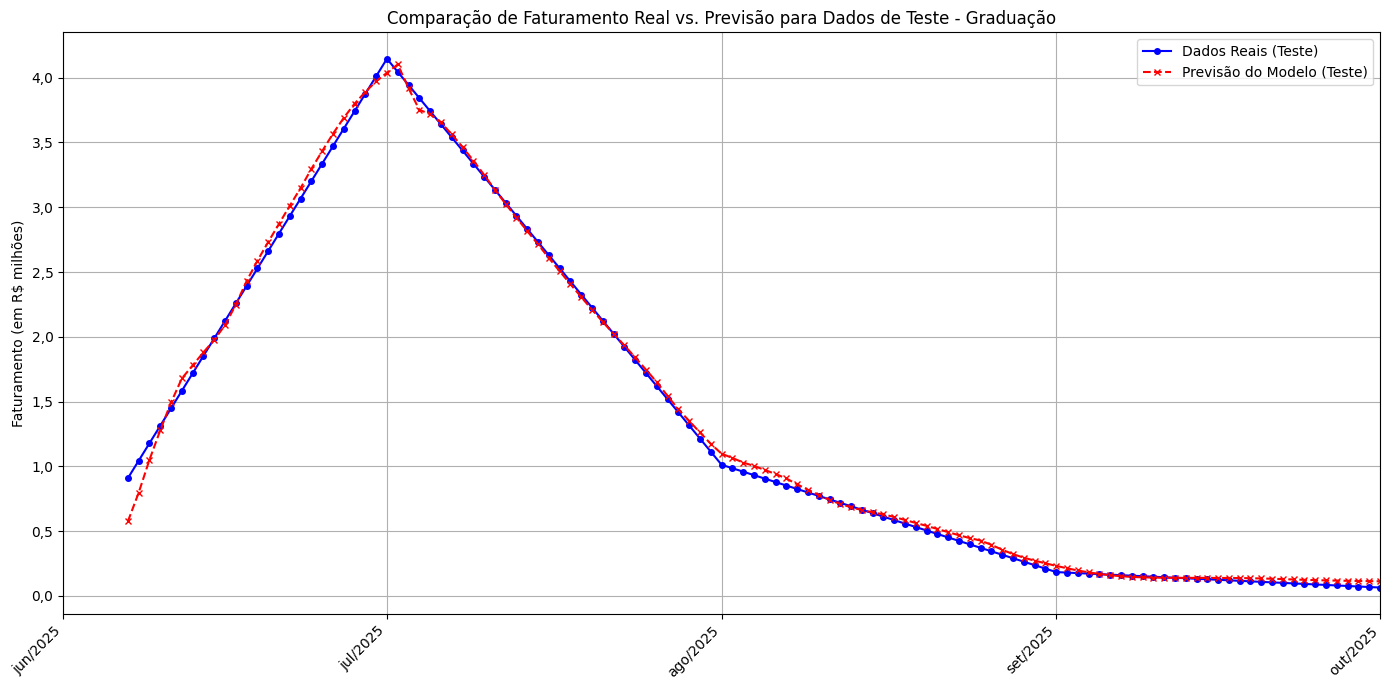

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import pandas as pd

plt.figure(figsize=(14, 7))
ax = plt.gca()

# Plotar os dados reais.
plt.plot(data_test.index[WINDOW_SIZE:], y_test, label='Dados Reais (Teste)', color='blue', marker='o', markersize=4, linestyle='-')
# Plotar os dados preditos.
plt.plot(data_test.index[WINDOW_SIZE:], y_test_predicted, label='Previsão do Modelo (Teste)', color='red', marker='x', markersize=4, linestyle='--')

plt.xlim([pd.to_datetime("2025-06"), pd.to_datetime("2025-10")]) # Foca no conjunto de teste
plt.legend()

# Cria uma função para formatar os valores do eixo y
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.1f}'.replace('.', ',')

# Aplica a função de formatação
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylabel('Faturamento (em R$ milhões)')

# Cria uma função para formatar os valores do eixo X
def portuguese_month_formatter(x, pos):
    date_obj = mdates.num2date(x)
    month_names_pt = {
        1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr', 5: 'mai', 6: 'jun',
        7: 'jul', 8: 'ago', 9: 'set', 10: 'out', 11: 'nov', 12: 'dez'
    }
    return f"{month_names_pt[date_obj.month]}/{date_obj.year}"

ax.xaxis.set_major_formatter(FuncFormatter(portuguese_month_formatter))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha='right')

plt.title('Comparação de Faturamento Real vs. Previsão para Dados de Teste - Graduação')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Gravar df_filtrado no formato csv
df_filtrado.to_csv('df_filtrado.csv', index=True)

# Considerações Finais
O modelo apresentado neste trabalho conseguiu capturar a sazonalidade da série, reproduzindo os picos anuais e a tendência geral. A previsão segue o comportamento esperado, indicando que o LSTM aprendeu bem os padrões temporais. No entanto, é importante destacar que a série utilizada (valores históricos de faturamento de cursos de Graduação) apresenta uma forte característica de sazonalidade, com picos anuais nos meses de fevereiro e julho, coincidindo com os períodos de matrículas. Como um desdobramento da proposta apresentada, sugere-se o treinamento do modelo para dados de outras linhas de serviços, que não possuam características de sazonalidade forte ou regularidade nas linhas históricas. Para esses casos, há forte probabilidade de ajustes nos hiperparâmetros do modelo.

Também destaca-se que o modelo possui limitações e uma das mais evidentes é que ele depende da qualidade dos dados apresentados. Registros indevidos, dependendo da consulta utilizada para o treinamento, podem interferir na projeção final. Outra limitação é a ausência de variáveis externas na projeção realizada pela máquina, como fatores macroeconômicos, investimentos realizados pela entidade, mudanças de estratégia do negócio que impactam no faturamento, etc.


Por fim, como possíveis ações de melhoria, destaca-se a ampliação dos dados do dataset utilizado, com a inclusão de dados anteriores a 2022. Outra sugestão seria a utilização de outros algoritmos de aprendizado de máquina, como modelos ARIMA e até mesmo Regressão Linear, para aplicação em datasets com forte sazonalidade e poucos ruídos na série temporal. A vantagem, em relação à modelos de rede neural, seria a utilização de uma técnica menos complexa, com menos hiperparâmetros para serem calibrados e que exigem menos capacidade computacional.
